In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import yellowbrick as yb
from yellowbrick.classifier import class_prediction_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.target import FeatureCorrelation, BalancedBinningReference, ClassBalance
classes = ['Adelie', 'Chinstrap', 'Gentoo']

In [2]:
df = pd.read_csv('dataset/penguins_size.csv')
label_encoder = LabelEncoder() 
df['species']= label_encoder.fit_transform(df['species']) 
df['species'].unique()

array([0, 2, 1])

In [3]:
label_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
categorical_columns = ['sex','island']

for column in categorical_columns:
    dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df,dummy], axis=1)
    del df[column]

In [5]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181,3750,0,1,0,0,1
1,0,39.5,17.4,186,3800,1,0,0,0,1
2,0,40.3,18.0,195,3250,1,0,0,0,1
3,0,36.7,19.3,193,3450,1,0,0,0,1
4,0,39.3,20.6,190,3650,0,1,0,0,1


In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [7]:
X[:5]

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00],
       [3.67e+01, 1.93e+01, 1.93e+02, 3.45e+03, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00],
       [3.93e+01, 2.06e+01, 1.90e+02, 3.65e+03, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00]])

In [8]:
y[:5]

array([0, 0, 0, 0, 0])

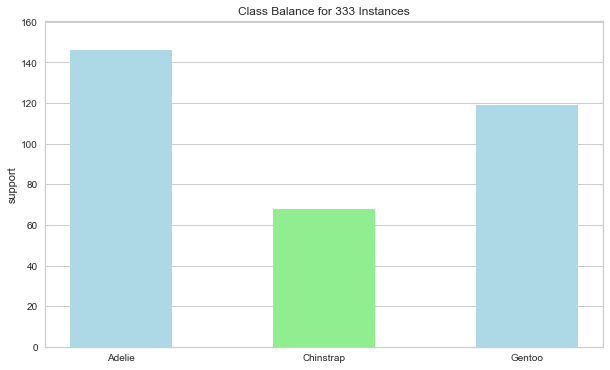

In [9]:
plt.figure(figsize=(10,6))
viz = ClassBalance(labels=classes,colors=['lightblue','lightgreen'])
viz.fit(y)
viz.show()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Random Forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 4)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [12]:
y_pred = rf_clf.predict(X_test)

**Classification Accuracy:**

In [13]:
print(accuracy_score(y_test, y_pred))

1.0


**Classification Error:**

In [14]:
print(1 - accuracy_score(y_test, y_pred))

0.0


**Sensitivity/True Positive Rate/Recall Score**

In [15]:
print(recall_score(y_test, y_pred,average="micro"))

1.0


**Precision Score:**

In [16]:
print(precision_score(y_test, y_pred,average="micro"))

1.0


**F1 Score**

In [17]:
print(f1_score(y_test, y_pred,average="micro"))

1.0


**Class Prediction Error**

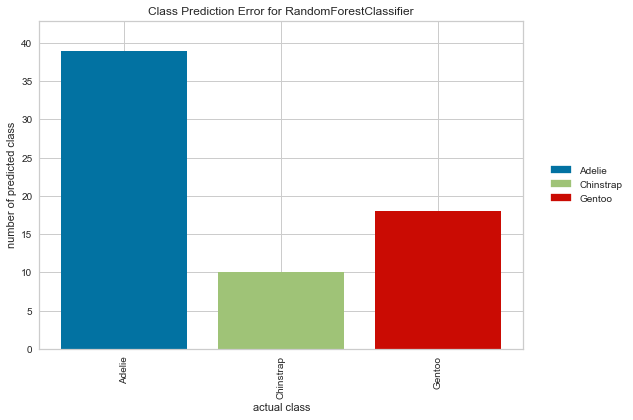

In [18]:
plt.figure(figsize=(10,6))
visualizer = class_prediction_error(rf_clf,X_train,y_train,X_test,y_test,classes=classes)
visualizer.show()
plt.show()

**Learning Curve**

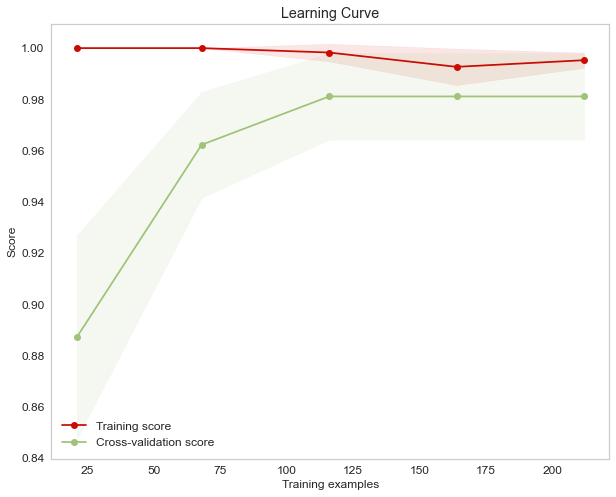

In [19]:
skplt.estimators.plot_learning_curve(rf_clf, X_train, y_train,figsize = (10,8))
plt.show()

**Feature Importance**

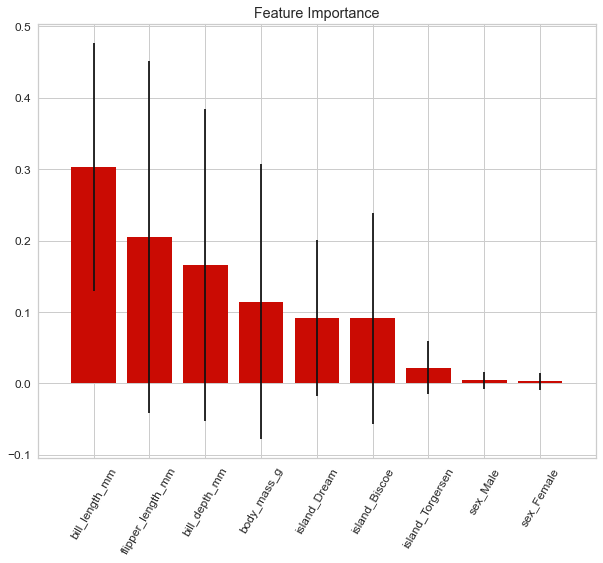

In [20]:
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
                 'body_mass_g', 'sex_Female', 'sex_Male', 'island_Biscoe',
                 'island_Dream', 'island_Torgersen']

skplt.estimators.plot_feature_importances(rf_clf, 
                                          feature_names = feature_names,figsize = (10,8))
plt.xticks(rotation = 60)
plt.show()

**ROC Curve**

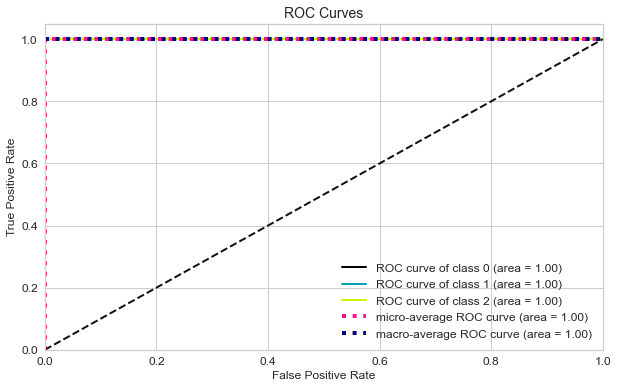

In [21]:
y_probas = rf_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Precision Recall Curve**

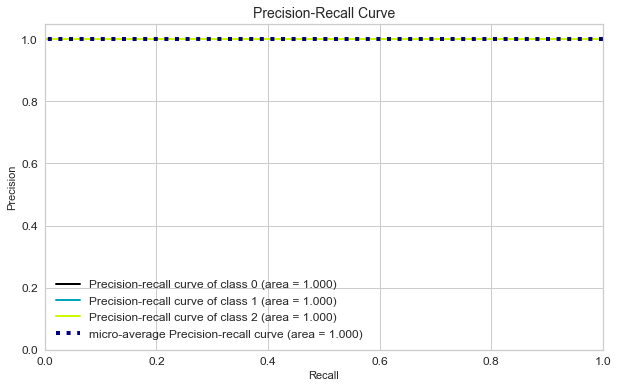

In [22]:
skplt.metrics.plot_precision_recall(y_test, y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Confusion Matrix**

In [23]:
confusion_matrix(y_test, y_pred)

array([[39,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 18]], dtype=int64)

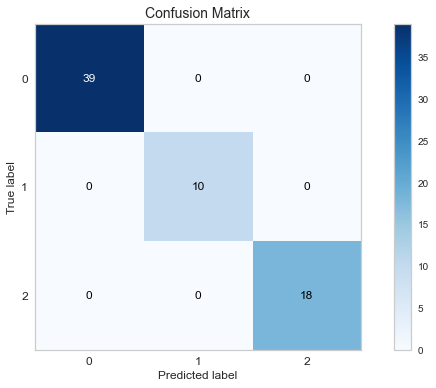

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Classification Report**

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



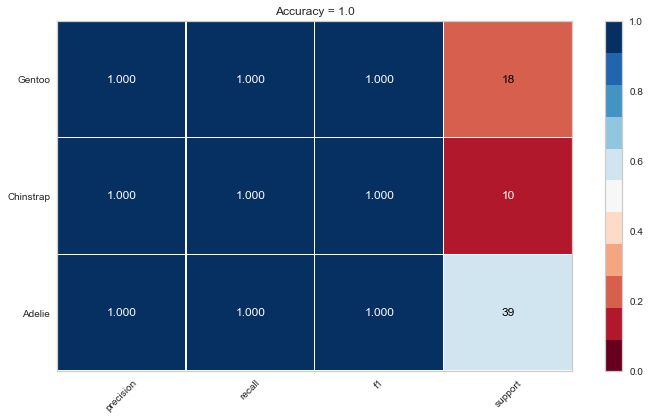

In [26]:
plt.figure(figsize=(10,6))
visualizer = yb.classifier.classification_report(
    rf_clf, X_train, y_train, X_test, y_test, classes=classes, support=True,cmap='RdBu',
    title = 'Accuracy = ' + str(accuracy_score(y_test,y_pred))
)
plt.show()